### Hourly Meteostat

In [1]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor
from datetime import datetime
from meteostat import Point, Hourly

warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('processed/442400146024_hourly.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,0.000000
1,2019-01-01 01:00:00,0.000000
2,2019-01-01 02:00:00,0.000000
3,2019-01-01 03:00:00,0.000000
4,2019-01-01 04:00:00,0.000000
...,...,...
47467,2024-05-31 19:00:00,35.941667
47468,2024-05-31 20:00:00,35.550374
47469,2024-05-31 21:00:00,35.983031
47470,2024-05-31 22:00:00,36.739853


In [3]:
# start dan end date meteostat
start = datetime(2019, 1, 1)
end = datetime(2024, 5, 31)

# locatie
sumbawa_besar = (-8.4932, 117.4202)

# data meteostat
point = Point(sumbawa_besar[0], sumbawa_besar[1], 0)
data = Hourly(point, start, end)
data = data.fetch()
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2019-01-01 00:00:00,26.1,25.2,95.0,NaN,NaN,140.0,5.4,NaN,1010.0,NaN,7.0
2019-01-01 01:00:00,27.7,24.7,84.0,NaN,NaN,321.0,5.5,NaN,1009.8,NaN,7.0
2019-01-01 02:00:00,28.7,24.7,79.0,NaN,NaN,329.0,7.4,NaN,1009.7,NaN,7.0
2019-01-01 03:00:00,25.4,24.9,97.0,NaN,NaN,323.0,0.0,NaN,1010.1,NaN,7.0
2019-01-01 04:00:00,29.5,25.0,77.0,NaN,NaN,327.0,11.1,NaN,1008.9,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30 20:00:00,25.5,23.7,90.0,0.0,NaN,134.0,7.4,NaN,1010.0,NaN,2.0
2024-05-30 21:00:00,26.0,22.9,83.0,0.0,NaN,90.0,7.6,NaN,1010.4,NaN,2.0
2024-05-30 22:00:00,26.5,22.8,80.0,0.0,NaN,132.0,7.4,NaN,1010.8,NaN,2.0


| Column   | Description                                                                                   | Type      |
|----------|-----------------------------------------------------------------------------------------------|-----------|
| station  | The Meteostat ID of the weather station (only if query refers to multiple stations)           | String    |
| time     | The datetime of the observation                                                               | Datetime64|
| temp     | The air temperature in °C                                                                     | Float64   |
| dwpt     | The dew point in °C                                                                           | Float64   |
| rhum     | The relative humidity in percent (%)                                                          | Float64   |
| prcp     | The one hour precipitation total in mm                                                        | Float64   |
| snow     | The snow depth in mm                                                                          | Float64   |
| wdir     | The average wind direction in degrees (°)                                                     | Float64   |
| wspd     | The average wind speed in km/h                                                                | Float64   |
| wpgt     | The peak wind gust in km/h                                                                    | Float64   |
| pres     | The average sea-level air pressure in hPa                                                     | Float64   |
| tsun     | The one hour sunshine total in minutes (m)                                                    | Float64   |
| coco     | The weather condition code                                                                    | Float64   |


In [32]:
data.isna().sum()

temp    0
dwpt    0
rhum    0
wdir    0
wspd    0
pres    0
coco    0
dtype: int64

Terdapat 2 fitur yang dapat kita isi nilainya yaitu `wdir` dan `coco`

In [33]:
data['coco'].describe()

count    47449.000000
mean         3.766296
std          4.573740
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: coco, dtype: float64

In [34]:
data['wdir'].describe()

count    47449.000000
mean       176.434552
std         84.824269
min          0.000000
25%        130.000000
50%        138.000000
75%        249.000000
max        360.000000
Name: wdir, dtype: float64

In [ ]:
data['wdir'].fillna(data['wdir'].mean(), inplace=True)
data['coco'].fillna(data['coco'].mode()[0], inplace=True)
data.drop(columns=['prcp', 'snow', 'wpgt', 'tsun'], inplace=True)
data.isna().sum()

In [36]:
data

,temp,dwpt,rhum,wdir,wspd,pres,coco
time,,,,,,,
2019-01-01 00:00:00,26.1,25.2,95.0,140.0,5.4,1010.0,7.0
2019-01-01 01:00:00,27.7,24.7,84.0,321.0,5.5,1009.8,7.0
2019-01-01 02:00:00,28.7,24.7,79.0,329.0,7.4,1009.7,7.0
2019-01-01 03:00:00,25.4,24.9,97.0,323.0,0.0,1010.1,7.0
2019-01-01 04:00:00,29.5,25.0,77.0,327.0,11.1,1008.9,8.0
...,...,...,...,...,...,...,...
2024-05-30 20:00:00,25.5,23.7,90.0,134.0,7.4,1010.0,2.0
2024-05-30 21:00:00,26.0,22.9,83.0,90.0,7.6,1010.4,2.0
2024-05-30 22:00:00,26.5,22.8,80.0,132.0,7.4,1010.8,2.0


In [37]:
# gabung data weather dengan data daily
# data weather merupakan data perjam, sedangkan data daily merupakan data 1 jaman
# gabungkan data perjam ke data weather sesuai dengan READ_DATE di data perjam 

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
# set index 
df.set_index('READ_DATE', inplace=True)

# gabungkan
df = df.join(data, how='left')
df

,KWH_EXP,temp,dwpt,rhum,wdir,wspd,pres,coco
READ_DATE,,,,,,,,
2019-01-01 00:00:00,0.000000,26.1,25.2,95.0,140.0,5.4,1010.0,7.0
2019-01-01 01:00:00,0.000000,27.7,24.7,84.0,321.0,5.5,1009.8,7.0
2019-01-01 02:00:00,0.000000,28.7,24.7,79.0,329.0,7.4,1009.7,7.0
2019-01-01 03:00:00,0.000000,25.4,24.9,97.0,323.0,0.0,1010.1,7.0
2019-01-01 04:00:00,0.000000,29.5,25.0,77.0,327.0,11.1,1008.9,8.0
...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,35.941667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31 20:00:00,35.550374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31 21:00:00,35.983031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.isna().sum()

KWH_EXP     0
temp       23
dwpt       23
rhum       23
wdir       23
wspd       23
pres       23
coco       23
dtype: int64

In [39]:
df.interpolate(method='linear', inplace=True)
df.isna().sum()

KWH_EXP    0
temp       0
dwpt       0
rhum       0
wdir       0
wspd       0
pres       0
coco       0
dtype: int64

In [40]:
df.to_csv('processed/442400146024_hourly_meteostat.csv')

<Axes: xlabel='READ_DATE'>

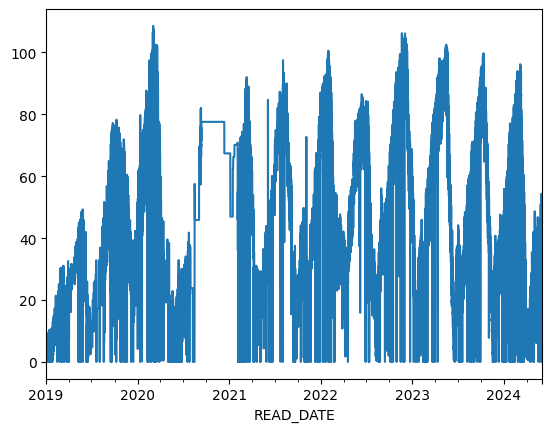

In [41]:
df['KWH_EXP'].plot()

In [65]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features(lags=[1, 6, 12, 24])
      .create_rolling_features(windows=[1, 6, 12, 24])
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [66]:
df_features

,KWH_EXP,READ_DATE_day,temp,dwpt,rhum,wdir,wspd,pres,coco,lag_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.402650,2019-01-01,26.1,25.2,95.0,140.0,5.4,1010.0,7.0,0.000000,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.209330,0.000425
2019-01-01 01:00:00,2.408348,2019-01-01,27.7,24.7,84.0,321.0,5.5,1009.8,7.0,2.402650,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.090785,0.000425
2019-01-01 02:00:00,2.406840,2019-01-01,28.7,24.7,79.0,329.0,7.4,1009.7,7.0,2.408348,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.082446,0.000425
2019-01-01 03:00:00,2.256511,2019-01-01,25.4,24.9,97.0,323.0,0.0,1010.1,7.0,2.406840,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.077927,0.000425
2019-01-01 04:00:00,2.065598,2019-01-01,29.5,25.0,77.0,327.0,11.1,1008.9,8.0,2.256511,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.115159,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,65.205495,2024-05-31,28.2,23.1,74.0,150.0,9.4,1011.6,2.0,65.268262,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,-0.086264,0.000425
2024-05-31 20:00:00,65.520523,2024-05-31,28.2,23.1,74.0,150.0,9.4,1011.6,2.0,65.205495,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.074562,0.000425
2024-05-31 21:00:00,66.389436,2024-05-31,28.2,23.1,74.0,150.0,9.4,1011.6,2.0,65.520523,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.096503,0.000425


In [67]:
df_features.to_csv('processed/442100110323_hourly_meteostat_features.csv')

### Hourly

In [ ]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('processed/442100110323_hourly.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.402650
1,2019-01-01 01:00:00,2.408348
2,2019-01-01 02:00:00,2.406840
3,2019-01-01 03:00:00,2.256511
4,2019-01-01 04:00:00,2.065598
...,...,...
47467,2024-05-31 19:00:00,65.205495
47468,2024-05-31 20:00:00,65.520523
47469,2024-05-31 21:00:00,66.389436
47470,2024-05-31 22:00:00,69.132420


In [ ]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')

df_weather.interpolate(method='linear', inplace=True)
df_weather.to_csv('processed/weather_2019_2024_standard.csv', index=False)
df_weather

,Tanggal,Tavg,RH_avg,RR,ss
0,2019-01-01,25.7,96.0,12.9,7.5
1,2019-01-02,25.9,90.0,42.7,6.7
2,2019-01-03,24.9,94.0,0.5,0.1
3,2019-01-04,25.8,88.0,34.6,0.1
4,2019-01-05,26.7,88.0,2.1,3.2
...,...,...,...,...,...
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0


In [ ]:
# gabung data weather dengan data daily
# data weather merupakan data harian, sedangkan data daily merupakan data 1 jaman
# sehingga data weather akan digabung ke data harian dengan cara mengflatkan data 1 jaman dalam 1 hari dengan data weather

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

df['READ_DATE_day'] = df['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

df = pd.merge(df, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
df.drop(columns=['Tanggal'], inplace=True)

In [ ]:
df.set_index('READ_DATE', inplace=True)
df.drop(columns=['READ_DATE_day'], inplace=True)

In [ ]:
df.isna().sum()

KWH_EXP    0
Tavg       0
RH_avg     0
RR         0
ss         0
dtype: int64

In [ ]:
df.to_csv('processed/442100110323_hourly_weather.csv')

In [ ]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features(lags=[1, 6, 12, 24])
      .create_rolling_features(windows=[1, 6, 12, 24])
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [ ]:
df_features

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_6,lag_12,lag_24,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.402650,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,2.402650,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.209330,0.000425
2019-01-01 01:00:00,2.408348,25.7,96.0,12.9,7.5,2.402650,0.000000,0.000000,0.000000,2.408348,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.090785,0.000425
2019-01-01 02:00:00,2.406840,25.7,96.0,12.9,7.5,2.408348,0.000000,0.000000,0.000000,2.406840,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.082446,0.000425
2019-01-01 03:00:00,2.256511,25.7,96.0,12.9,7.5,2.406840,0.000000,0.000000,0.000000,2.256511,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.077927,0.000425
2019-01-01 04:00:00,2.065598,25.7,96.0,12.9,7.5,2.256511,0.000000,0.000000,0.000000,2.065598,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.115159,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,65.205495,29.8,68.0,0.0,10.8,65.268262,73.044454,75.646947,60.058114,65.205495,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,-0.086264,0.000425
2024-05-31 20:00:00,65.520523,29.8,68.0,0.0,10.8,65.205495,71.052517,76.229854,63.987306,65.520523,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.074562,0.000425
2024-05-31 21:00:00,66.389436,29.8,68.0,0.0,10.8,65.520523,68.469683,73.488070,65.499925,66.389436,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.096503,0.000425


In [ ]:
df_features.to_csv('processed/442100110323_hourly_weather_features.csv')

In [4]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('processed/442100110323_hourly.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.402650
1,2019-01-01 01:00:00,2.408348
2,2019-01-01 02:00:00,2.406840
3,2019-01-01 03:00:00,2.256511
4,2019-01-01 04:00:00,2.065598
...,...,...
47467,2024-05-31 19:00:00,65.205495
47468,2024-05-31 20:00:00,65.520523
47469,2024-05-31 21:00:00,66.389436
47470,2024-05-31 22:00:00,69.132420


In [6]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')

df_weather.interpolate(method='linear', inplace=True)
df_weather.to_csv('processed/weather_2019_2024_standard.csv', index=False)
df_weather

,Tanggal,Tavg,RH_avg,RR,ss
0,2019-01-01,25.7,96.0,12.9,7.5
1,2019-01-02,25.9,90.0,42.7,6.7
2,2019-01-03,24.9,94.0,0.5,0.1
3,2019-01-04,25.8,88.0,34.6,0.1
4,2019-01-05,26.7,88.0,2.1,3.2
...,...,...,...,...,...
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0


In [7]:
# gabung data weather dengan data daily
# data weather merupakan data harian, sedangkan data daily merupakan data 1 jaman
# sehingga data weather akan digabung ke data harian dengan cara mengflatkan data 1 jaman dalam 1 hari dengan data weather

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

df['READ_DATE_day'] = df['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

df = pd.merge(df, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
df.drop(columns=['Tanggal'], inplace=True)

In [8]:
df.set_index('READ_DATE', inplace=True)
df.drop(columns=['READ_DATE_day'], inplace=True)

In [9]:
df.isna().sum()

KWH_EXP    0
Tavg       0
RH_avg     0
RR         0
ss         0
dtype: int64

In [10]:
df.to_csv('processed/442100110323_hourly_weather.csv')

In [11]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features(lags=[1, 6, 12, 24])
      .create_rolling_features(windows=[1, 6, 12, 24])
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [12]:
df_features

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_6,lag_12,lag_24,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.402650,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,2.402650,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.209330,0.000425
2019-01-01 01:00:00,2.408348,25.7,96.0,12.9,7.5,2.402650,0.000000,0.000000,0.000000,2.408348,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.090785,0.000425
2019-01-01 02:00:00,2.406840,25.7,96.0,12.9,7.5,2.408348,0.000000,0.000000,0.000000,2.406840,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.082446,0.000425
2019-01-01 03:00:00,2.256511,25.7,96.0,12.9,7.5,2.406840,0.000000,0.000000,0.000000,2.256511,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.077927,0.000425
2019-01-01 04:00:00,2.065598,25.7,96.0,12.9,7.5,2.256511,0.000000,0.000000,0.000000,2.065598,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.115159,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,65.205495,29.8,68.0,0.0,10.8,65.268262,73.044454,75.646947,60.058114,65.205495,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,-0.086264,0.000425
2024-05-31 20:00:00,65.520523,29.8,68.0,0.0,10.8,65.205495,71.052517,76.229854,63.987306,65.520523,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.074562,0.000425
2024-05-31 21:00:00,66.389436,29.8,68.0,0.0,10.8,65.520523,68.469683,73.488070,65.499925,66.389436,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.096503,0.000425


In [13]:
df_features.to_csv('processed/442100110323_hourly_weather_features.csv')

### Standard

In [14]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor

warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv('processed/442100110323_standard.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.334143
1,2019-01-01 00:15:00,2.344050
2,2019-01-01 00:30:00,2.500311
3,2019-01-01 00:45:00,2.432096
4,2019-01-01 01:00:00,2.388465
...,...,...
189883,2024-05-31 22:45:00,69.132420
189884,2024-05-31 23:00:00,69.132420
189885,2024-05-31 23:15:00,68.774401
189886,2024-05-31 23:30:00,68.765215


In [16]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')

df_weather.interpolate(method='linear', inplace=True)

In [17]:
# gabung data weather dengan data daily
# data weather merupakan data harian, sedangkan data daily merupakan data 15 menitan
# sehingga data weather akan digabung ke data harian dengan cara mengflatkan data 15 menitan dalam 1 hari dengan data weather

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

df['READ_DATE_day'] = df['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

df = pd.merge(df, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
df.drop(columns=['Tanggal'], inplace=True)

In [ ]:
df.set_index('READ_DATE', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df.isna().sum()

KWH_EXP    0
Tavg       0
RH_avg     0
RR         0
ss         0
dtype: int64

In [ ]:
df.to_csv('processed/442100110323_standard_weather.csv')

In [ ]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features()
      .create_rolling_features()
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [ ]:
df_features

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_3,lag_7,lag_28,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.334143,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,2.334143,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,-0.017837,-0.000047
2019-01-01 00:15:00,2.344050,25.7,96.0,12.9,7.5,2.334143,0.000000,0.000000,0.000000,2.344050,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,-0.011514,-0.000047
2019-01-01 00:30:00,2.500311,25.7,96.0,12.9,7.5,2.344050,0.000000,0.000000,0.000000,2.500311,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.008583,-0.000047
2019-01-01 00:45:00,2.432096,25.7,96.0,12.9,7.5,2.500311,2.334143,0.000000,0.000000,2.432096,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.064360,-0.000047
2019-01-01 01:00:00,2.388465,25.7,96.0,12.9,7.5,2.432096,2.344050,0.000000,0.000000,2.388465,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.045630,-0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,69.132420,29.8,68.0,0.0,10.8,69.132420,69.132420,65.469139,63.243948,69.132420,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,-0.035359,-0.000047
2024-05-31 23:00:00,69.132420,29.8,68.0,0.0,10.8,69.132420,69.132420,65.559856,63.452988,69.132420,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,-0.003232,-0.000047
2024-05-31 23:15:00,68.774401,29.8,68.0,0.0,10.8,69.132420,69.132420,66.302510,63.512601,68.774401,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,0.030413,-0.000047


In [ ]:
df_features.to_csv('processed/442100110323_standard_weather_features.csv')